<a href="https://colab.research.google.com/github/adhang/learn-data-science/blob/main/LendingClub_Loan_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LendingClub - Loan Credit Prediction

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

# Importing Libraries

In [1]:
# !pip install datawig
# !pip install inflection
# !pip install dython
# !pip install shap

# !pip install --upgrade pandas
# !pip install --upgrade numpy
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn

In [2]:
# data manipulation
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# CamelCase to snake_case
import inflection

# missing values imputation
import datawig

# association between attributes
from dython.nominal import associations

# train test split
from sklearn.model_selection import train_test_split

# Dataset Overview

## Reading Dataset

In [3]:
path = '/content/drive/MyDrive/My Projects/2022/Internship - id x partners/dataset/loan_data_2007_2014.csv'

data = pd.read_csv(path, dtype={'desc':str})
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first column (`Unnamed: 0`) is just like an index, so I'll drop it.

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Duplicated Values

In [5]:
data.duplicated().sum()

0

There's no duplicated value, good start.

## Data Types

### Numeric

In [6]:
data.select_dtypes(include=np.number).head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Categorical

In [7]:
data.select_dtypes(exclude=np.number).head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,NaN,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-99,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,NaN,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,Feb-96,f,Jan-15,NaN,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL


In [8]:
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()
column_categorical

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

## Missing Values

In [9]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

with pd.option_context('display.precision', 0):
  display(data_null.sort_values('total_null', ascending=False).style.background_gradient())

,total_null,percentage_null
inq_last_12m,466285,100
verification_status_joint,466285,100
open_acc_6m,466285,100
open_il_6m,466285,100
open_il_12m,466285,100
open_il_24m,466285,100
mths_since_rcnt_il,466285,100
dti_joint,466285,100
total_bal_il,466285,100
annual_inc_joint,466285,100


In [10]:
data.shape

(466285, 74)

As we can see, there are some columns that have pretty much missing values. Moreover, some columns are only containing missing values.

## Dropping Column with Many Missing Values

I will drop some columns with missing values of more than 40%

In [11]:
mask = data_null['percentage_null'] > 40
column_null = data_null.loc[mask].index.tolist()

data.drop(columns=column_null, inplace=True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [12]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

,total_null,percentage_null
total_rev_hi_lim,70276,15
tot_coll_amt,70276,15
tot_cur_bal,70276,15
emp_title,27588,6
emp_length,21008,5
last_pymnt_d,376,0
revol_util,340,0
collections_12_mths_ex_med,145,0
last_credit_pull_d,42,0
delinq_2yrs,29,0


In [13]:
data.shape

(466285, 52)

I have deleted 22 columns. Now, the highest column that has missing values is only 15%.

In [14]:
mask = data_null['total_null'] != 0
column_null = data_null[mask].index.tolist()
column_null

['emp_title',
 'emp_length',
 'annual_inc',
 'title',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

# Data Preprocessing

## Column List

In [15]:
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_numerical

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [16]:
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()
column_categorical

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

## Categorical Unique Values

In [17]:
data[column_categorical].apply(lambda x: x.unique())

term                                            [ 36 months,  60 months]
grade                                              [B, C, A, E, F, D, G]
sub_grade              [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...
emp_title              [nan, Ryder, AIR RESOURCES BOARD, University M...
emp_length             [10+ years, < 1 year, 1 year, 3 years, 8 years...
home_ownership                   [RENT, OWN, MORTGAGE, OTHER, NONE, ANY]
verification_status            [Verified, Source Verified, Not Verified]
issue_d                [Dec-11, Nov-11, Oct-11, Sep-11, Aug-11, Jul-1...
loan_status            [Fully Paid, Charged Off, Current, Default, La...
pymnt_plan                                                        [n, y]
url                    [https://www.lendingclub.com/browse/loanDetail...
purpose                [credit_card, car, small_business, other, wedd...
title                  [Computer, bike, real estate business, persone...
zip_code               [860xx, 309xx, 606xx, 917xx,

In [18]:
data[column_categorical].nunique().sort_values()

application_type            1
initial_list_status         2
term                        2
pymnt_plan                  2
verification_status         3
home_ownership              6
grade                       7
loan_status                 9
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    91
last_pymnt_d               98
last_credit_pull_d        103
earliest_cr_line          664
zip_code                  888
title                   63099
emp_title              205475
url                    466285
dtype: int64

- The `application_type` only has a single unique value. So, I'll drop it since it will not give any information
- There are some columns that have too many categories. I will drop it since it will make the model become overvit or too sensitive to "noise"
- ~For a column that has many categories, if there are missing values in it, I will simply fill it with its most frequent value (mode)~

## Dropping Columns

### Single Variation

I will drop the `application_type` since it only has a single variation

In [19]:
data.drop(columns=['application_type'], inplace=True)

### Too Many Variation

I will drop some categorical columns that have too many categories and hard to find its pattern. From the previous section, we know that `title`, `emp_title`, and `url` have too many variation. So, I will drop it.

In [20]:
data.drop(columns=['title', 'emp_title', 'url'], inplace=True)

### Zip Code

In [21]:
data[['zip_code', 'addr_state']].sort_values('zip_code').head(10)

,zip_code,addr_state
29984,007xx,NJ
342425,007xx,FL
285814,007xx,PA
325695,008xx,VA
231293,010xx,MA
9236,010xx,MA
43706,010xx,MA
113322,010xx,MA
113272,010xx,MA
9270,010xx,MA


As we can see, a same zip code has different address state. So, I think zip code (in this dataset) doesn't give an exact information. So, I will drop it.

In [22]:
data.drop(columns=['zip_code'], inplace=True)

### ID Number

I think, the ID number (`id` and `member_id`) doesn't give any information about the borrowers. I will drop it.

In [40]:
data.drop(columns=['id', 'member_id'], inplace=True)

### Update Column List

In [41]:
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

data[column_categorical].nunique().sort_values()

term                    2
pymnt_plan              2
initial_list_status     2
target                  2
verification_status     3
home_ownership          6
grade                   7
loan_status             9
emp_length             11
purpose                14
sub_grade              35
addr_state             50
dtype: int64

As seen above, the last 4 columns that have the highest variation are date columns.

## Date Columns

I do this project on a limited time. So, this is a simple approach to handle the date columns. I will just use the 'year' instead of 'month-year' format. Fortunately, the date columns are in a fixed format (and clean!)

In [ ]:
columns_date = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

for col in columns_date:
  # split to individual columns
  tmp = data[col].str.split('-', expand=True)
  tmp = tmp.rename(columns={0:'month', 1:'year'})

  # convert the 'year' column to numeric
  tmp['year'] = pd.to_numeric(tmp['year'], errors='coerce')

  # assign to the original dataset
  data[col] = tmp['year']

## Target Variable

This dataset information doesn't give an explicit information about its target variable. After reading all of the provided attribute information, I end up in a conclusion: The target variable is the loan status.

In [43]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [44]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

As shown above, the loan status has many categories.
<br><br>

Based on [LendingClub](https://help.lendingclub.com/hc/en-us/articles/216109367-What-do-the-different-Note-statuses-mean-), the definition of each status is:
- `Fully Paid`: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
- `Current`: Loan is up to date on all outstanding payments.
- `In Grace Period`: Loan is past due but within the 15-day grace period.
- `Late (16-30)`: Loan has not been current for 16 to 30 days.
- `Late (31-120)`: Loan has not been current for 31 to 120 days.
- `Default`: Loan has not been current for 121 days or more.
- `Charged Off`: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached.
<br><br>

Based on those descriptions, I will create a new feature whether the loan status is `Good` or `Bad`. 
<br><br>

The `Good` status is when the loan status is either `Current` or `Fully Paid`, otherwise the status is `Bad`.
<br><br>

I won't include the `Does not meet the credit policy. Status:Fully Paid` as a `Good` status, because it doesn't meet the credit policy.

In [45]:
good_status = ['Fully Paid', 'Current']

data['target'] = data['loan_status'].apply(lambda x: 'Good' if x in good_status else 'Bad')

data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,11,Fully Paid,n,credit_card,AZ,27.65,0.0,85.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,15.0,171.62,16.0,0.0,1,0.0,NaN,NaN,NaN,Good
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,11,Charged Off,n,car,GA,1.00,0.0,99.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,13.0,119.66,13.0,0.0,1,0.0,NaN,NaN,NaN,Bad
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,11,Fully Paid,n,small_business,IL,8.72,0.0,1.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,14.0,649.91,16.0,0.0,1,0.0,NaN,NaN,NaN,Good
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,11,Fully Paid,n,other,CA,20.00,0.0,96.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,15.0,357.48,15.0,0.0,1,0.0,NaN,NaN,NaN,Good
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,11,Current,n,other,OR,17.94,0.0,96.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,16.0,67.79,16.0,0.0,1,0.0,NaN,NaN,NaN,Good


## Update Column List

In [46]:
column_numerical = data.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data.select_dtypes(exclude=np.number).columns.values.tolist()

In [47]:
data[column_categorical].nunique().sort_values()

term                    2
pymnt_plan              2
initial_list_status     2
target                  2
verification_status     3
home_ownership          6
grade                   7
loan_status             9
emp_length             11
purpose                14
sub_grade              35
addr_state             50
dtype: int64

## Feature Associations

I will calculate the associations between each features to the target variable. Then, I will drop some features that have very small associations to the target variable.
<br><br>
I will mark the independent features that are highly correlated to each other, or we can say it as multicollinearity.

In [48]:
# calculate the associations (correlation) between features
associations_out = associations(data,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

### Feature Relationship

Associations can be used to describe the relationship between features.

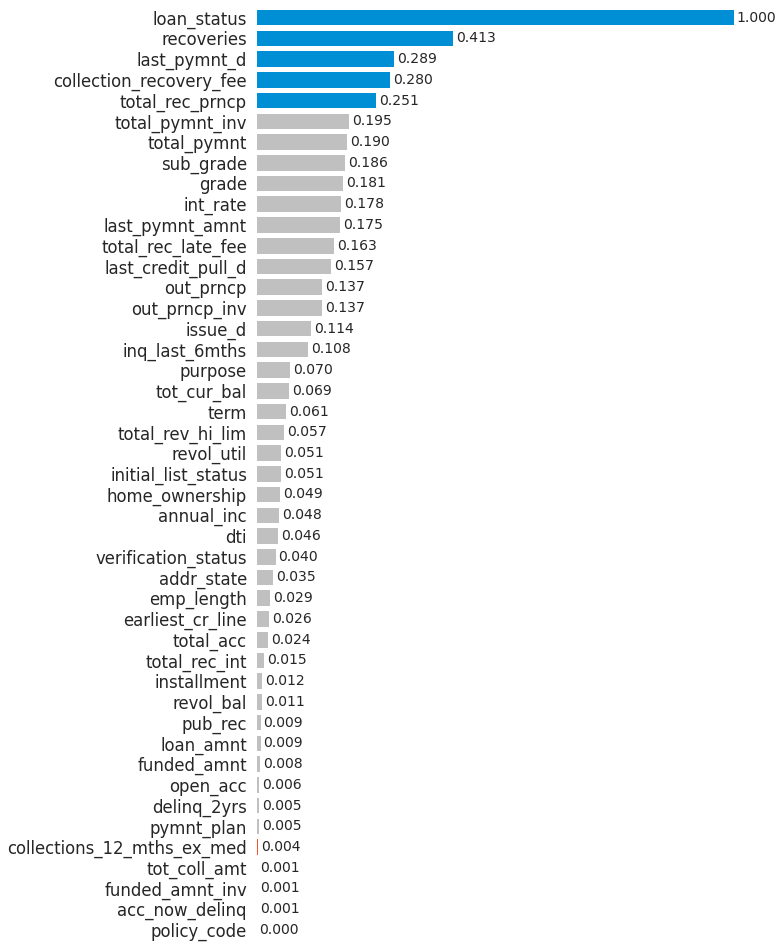

In [49]:
# custom palette top associations
threshold_top = 5
threshold_bot = corr_target.size - threshold_top - 1
palette = []
for i in range(0, len(corr_target)):
  if i < threshold_top:
    palette.append('#008FD5') # blue
  elif i > threshold_bot:
    palette.append('#FC4F30') # red
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,16))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette, saturation=1)
ax.bar_label(ax.containers[0], padding=3, fmt='%.3f', fontsize=14, fontweight='medium')

# custom y label color
# for i, label in enumerate(ax.yaxis.get_ticklabels()):
#   if (i >= threshold_top) and (i <= threshold_bot):
#     label.set_color('silver')

# custom bar label visibility
# for con in ax.containers:
#   # labels = [val for val in con.datavalues]
#   labels = con.datavalues
#   labels_len = len(labels)

#   # masking the top 3 an bottom 3
#   np.put(labels, np.arange(3,labels_len-3), [-1])
  
#   # hide the labels for non-top 3 and non-bottom 3
#   labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

#   ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

plt.show()

There are some features that have low associations with the target variable. Maybe, I will drop it.
<br><br>
And surprisingly, the loan amount have a very low association with the target variable.

### Multicollinearity

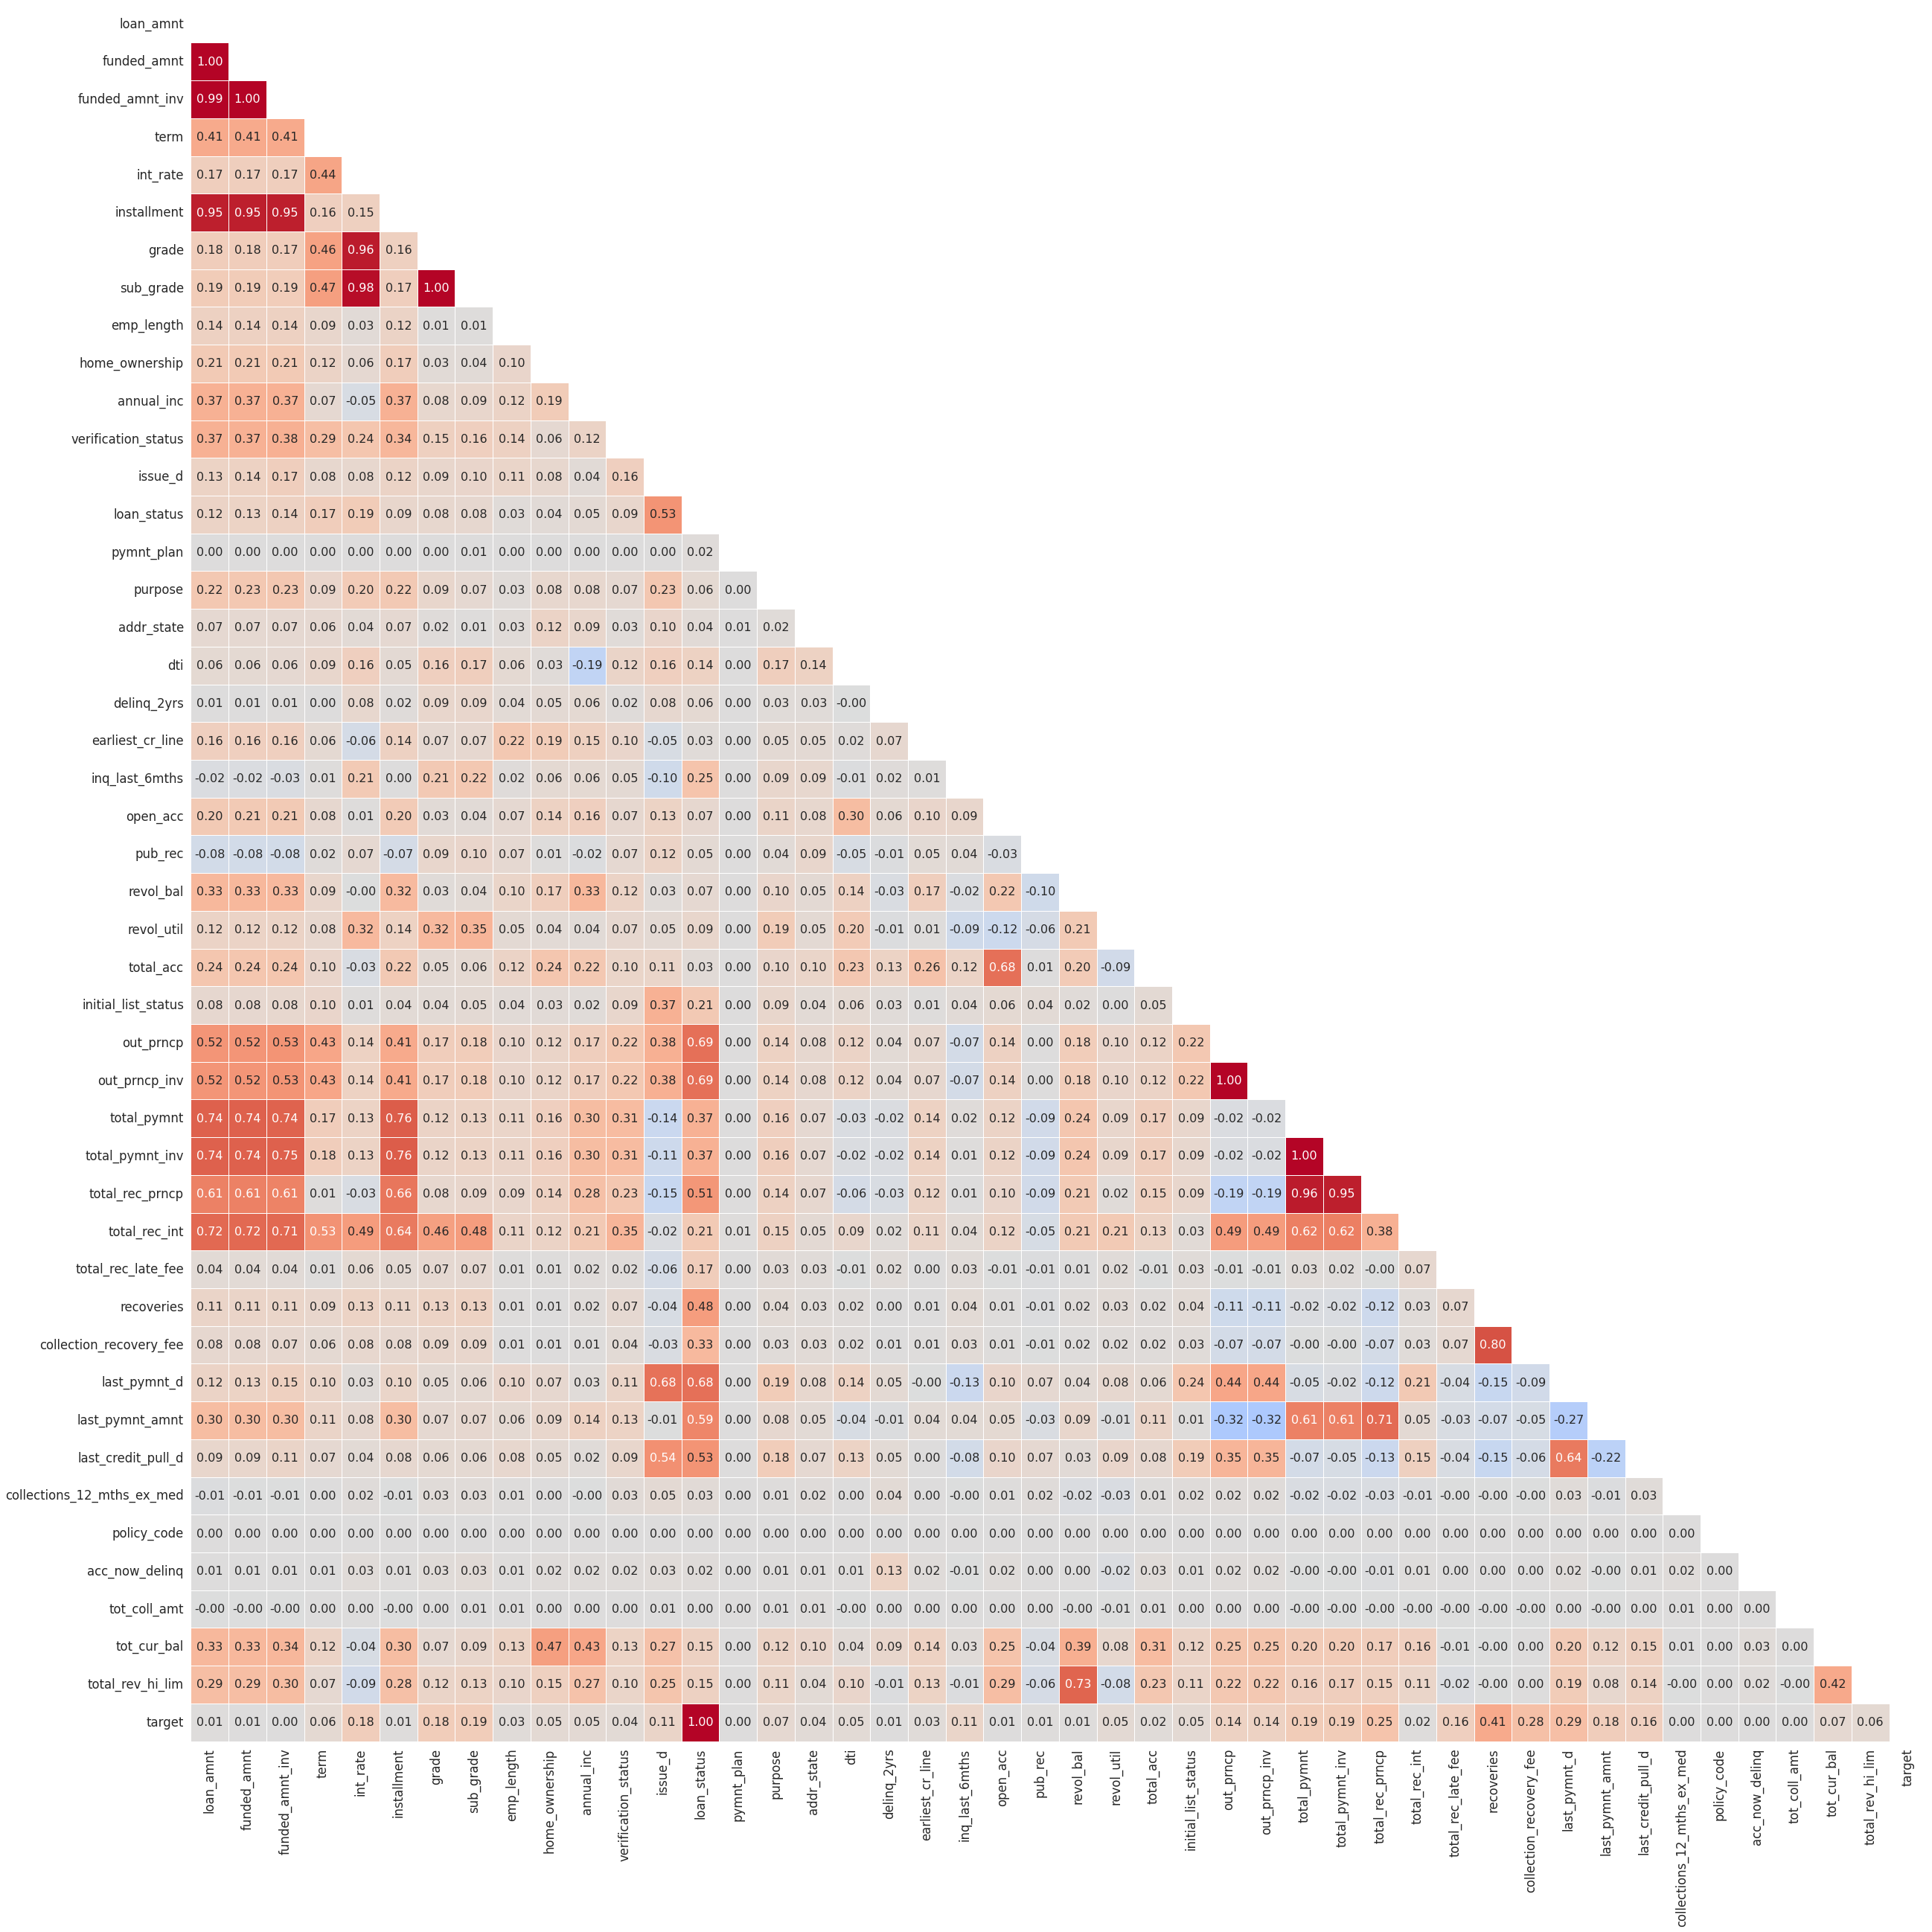

In [52]:
mask = np.triu(np.ones_like(corr_all, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_all, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, fmt='.2f', ax=ax)

plt.show()

At glance, there are some multicollinearity. To check multicollinearity, we can use Variance Inflation Factor (VIF). But, I will not do it now.
<br><br>
There are two simple and commonly used ways to correct multicollinearity, as listed below:
- The first one is to remove one (or more) of the highly correlated variables. Since the information provided by the variables is redundant, the coefficient of determination will not be greatly impaired by the removal.
- The second method is to use principal components analysis (PCA) or partial least square regression (PLS) instead of OLS regression. PLS regression can reduce the variables to a smaller set with no correlation among them. In PCA, new uncorrelated variables are created. It minimizes information loss and improves the predictability of a model.
<br>

[Source](https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/)

### Handling Multicollinearity

For now, I will just drop some features (independent variables) that are highly correlated to each other. My strategy is, to find the features that have multicollinearity, then drop the features that have the lowest associations to the target variable.
<br><br>
I'm not calculating the VIF because I haven't encoded the categorical features. I will recheck the multicollinearity later.

In [70]:
column_corr = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
               'grade', 'int_rate',
               'out_prncp_inv', 
               'total_pymnt', 'total_pymnt_inv',
               'collection_recovery_fee']

In [71]:
data_drop = data.copy()

data_drop.drop(columns=column_corr, inplace=True)

data_drop.head()

,term,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,36 months,162.87,B2,10+ years,RENT,24000.0,Verified,11,Fully Paid,n,credit_card,AZ,27.65,0.0,85.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,5000.00,861.07,0.00,0.00,15.0,171.62,16.0,0.0,1,0.0,NaN,NaN,NaN,Good
1,60 months,59.83,C4,< 1 year,RENT,30000.0,Source Verified,11,Charged Off,n,car,GA,1.00,0.0,99.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,456.46,435.17,0.00,117.08,13.0,119.66,13.0,0.0,1,0.0,NaN,NaN,NaN,Bad
2,36 months,84.33,C5,10+ years,RENT,12252.0,Not Verified,11,Fully Paid,n,small_business,IL,8.72,0.0,1.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,2400.00,603.65,0.00,0.00,14.0,649.91,16.0,0.0,1,0.0,NaN,NaN,NaN,Good
3,36 months,339.31,C1,10+ years,RENT,49200.0,Source Verified,11,Fully Paid,n,other,CA,20.00,0.0,96.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,10000.00,2209.33,16.97,0.00,15.0,357.48,15.0,0.0,1,0.0,NaN,NaN,NaN,Good
4,60 months,67.79,B5,1 year,RENT,80000.0,Source Verified,11,Current,n,other,OR,17.94,0.0,96.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,2233.10,1009.07,0.00,0.00,16.0,67.79,16.0,0.0,1,0.0,NaN,NaN,NaN,Good


In [72]:
# calculate the associations (correlation) between features
associations_out = associations(data_drop,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['target'].drop('target').sort_values(ascending=False)

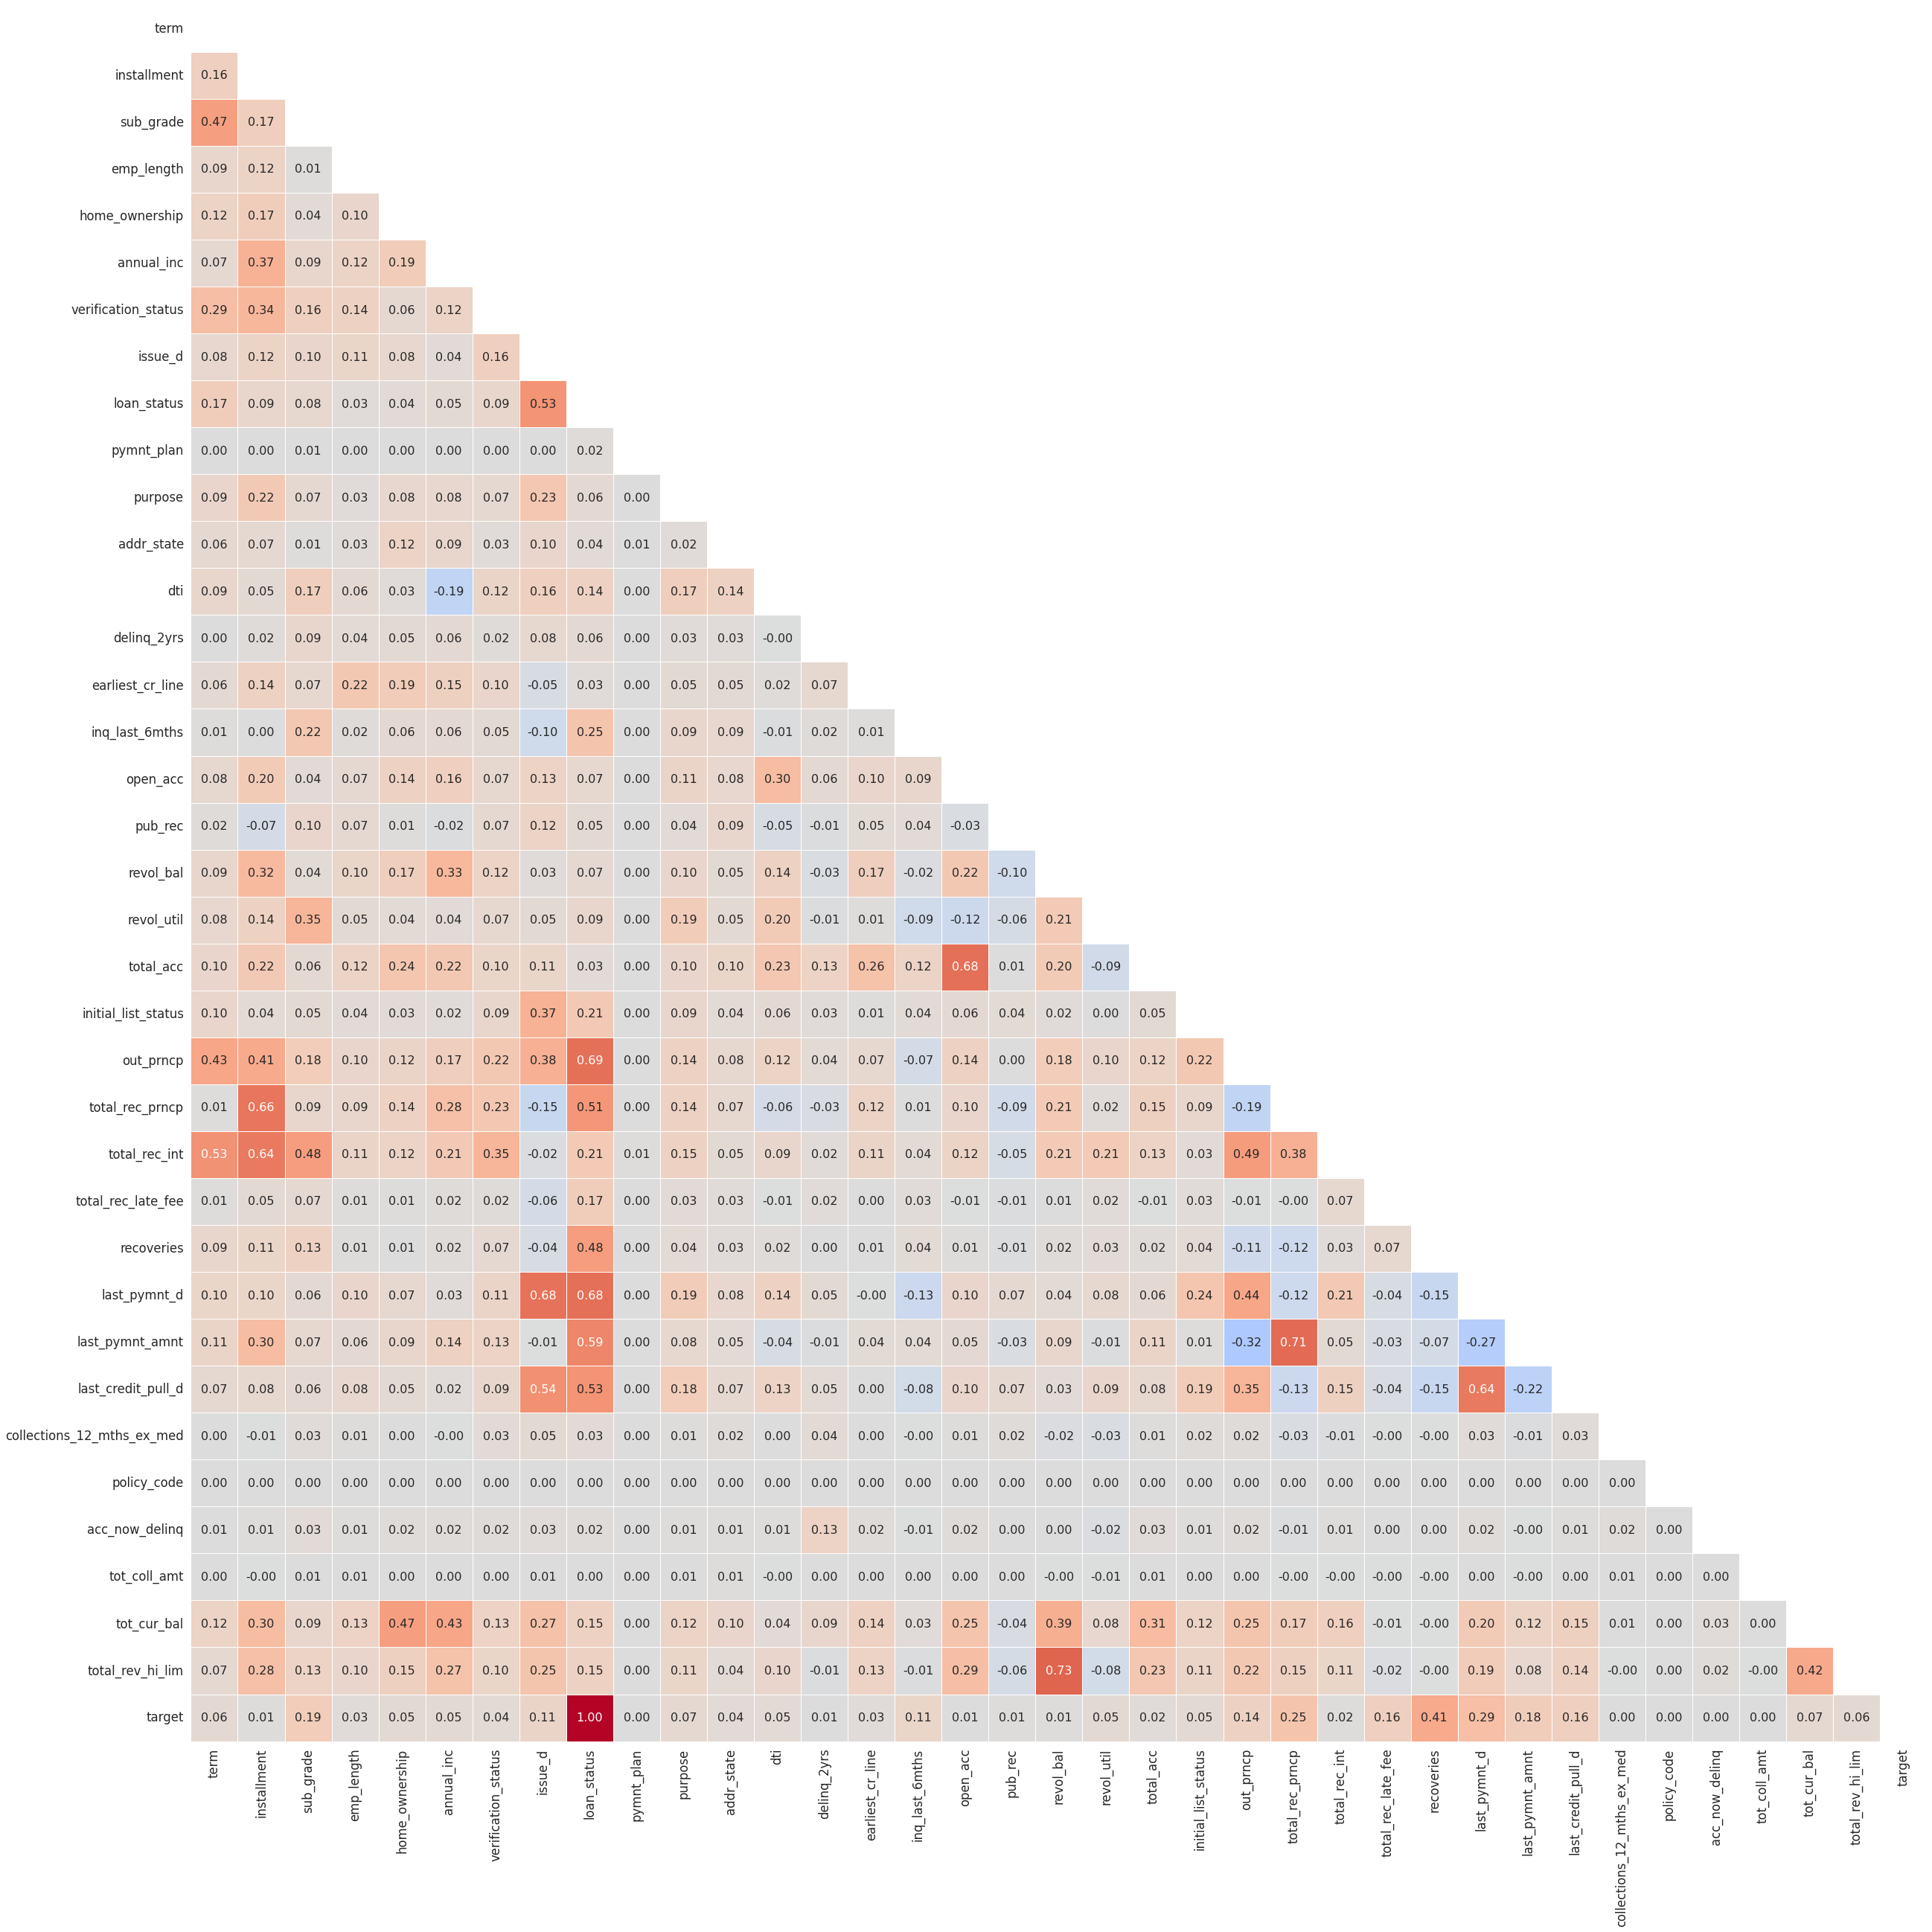

In [73]:
mask = np.triu(np.ones_like(corr_all, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_all, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, fmt='.2f', ax=ax)

plt.show()

Now, the independent variables are less correlated.
<br><br>
Note: Just ignore the `loan_status` and `target`, since it has the same meaning so it must have a high association. I haven't dropped it yet.

## Update Missing Values Table

In [ ]:
# total null values
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total_null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage_null'})

data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T

mask = data_null['total_null'] != 0
with pd.option_context('display.precision', 0):
  display(data_null.loc[mask].sort_values('total_null', ascending=False).style.background_gradient())

,total_null,percentage_null
tot_coll_amt,70276,15
tot_cur_bal,70276,15
total_rev_hi_lim,70276,15
emp_length,21008,5
last_pymnt_d,376,0
revol_util,340,0
collections_12_mths_ex_med,145,0
last_credit_pull_d,42,0
delinq_2yrs,29,0
earliest_cr_line,29,0


In [ ]:
mask = data_null['total_null'] != 0
column_null = data_null[mask].index.tolist()
column_null

['emp_length',
 'annual_inc',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

## Train - Test Split

I use a 70% : 30% ratio for the training set and testing set respectively.

In [ ]:
data_X = data.drop('target', axis=1)
data_y = data['target']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

I do train-test split first to prevent data leakage when doing the data preprocessing steps

## Missing Values Imputation

The best approach to do imputation is using domain knowledge, asking an expert, or looking for its pattern. However, I don't have any experience in the finance domain. Therefore, I will use this approach:
- ~For categorical features that have many categories, I will use a simple imputation (most frequent)~
- ~Drop categorical features that have too many categories and hard to find its pattern~
- Use DataWig for the other features, including the categorical and numerical features

### DataWig Imputation

#### Train - Test Selection
- Train - contains no null values
- Test - contain all null values

In [ ]:
datawig_train = X_train.dropna().copy()
datawig_test = X_train[X_train.isna().any(axis=1)].copy()

#### Train - Test Split
It's used to train and evaluate the DataWig performance. So, it's based on the `datawig_train` (which contains no null values)

In [ ]:
df_train, df_test = datawig.utils.random_split(datawig_train, split_ratios=[0.8, 0.2])

#### Imputation Process

In [ ]:
X_train[column_null].isna().sum()

emp_length                    14720
annual_inc                        4
delinq_2yrs                      21
earliest_cr_line                 21
inq_last_6mths                   21
open_acc                         21
pub_rec                          21
revol_util                      241
total_acc                        21
last_pymnt_d                    255
last_credit_pull_d               31
collections_12_mths_ex_med      105
acc_now_delinq                   21
tot_coll_amt                  49155
tot_cur_bal                   49155
total_rev_hi_lim              49155
dtype: int64

In [ ]:
X_test[column_null].isna().sum()

emp_length                     6288
annual_inc                        0
delinq_2yrs                       8
earliest_cr_line                  8
inq_last_6mths                    8
open_acc                          8
pub_rec                           8
revol_util                       99
total_acc                         8
last_pymnt_d                    121
last_credit_pull_d               11
collections_12_mths_ex_med       40
acc_now_delinq                    8
tot_coll_amt                  21121
tot_cur_bal                   21121
total_rev_hi_lim              21121
dtype: int64

In [ ]:
for col in column_null:
  print('=========================')
  print('=========================')
  print('Imputation for', col)

  drive = '/content/drive/MyDrive/My Projects/2022/Internship - id x partners/imputer/'
  path = drive + f'imputed_{col}'

  # create a single imputer for specific column
  imputer = datawig.SimpleImputer(
      input_columns = df_train.drop(columns=[col]).columns.tolist(),
      output_column = col,
      output_path = path
  )

  # fit the imputer model
  imputer.fit(datawig_train)

  # make predictions on missing values
  predictions = imputer.predict(datawig_test)

  # impute the missing values
  mask = datawig_test[col].isna()

  imputed_col = f'{col}_imputed'
  datawig_test.loc[mask, col] = predictions.loc[mask, imputed_col]

# Exploratory Data Analysis

## Visualization Function

In [ ]:
def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['Good', 'Bad'], axis=1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('Bad', ascending=False)
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(x=i,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('Bad', ascending=True)
    crosstab.plot(kind='barh', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(y=i,
                  x=(x_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Bad Loan Probability by {x_titleize}')      
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

## Target Distribution

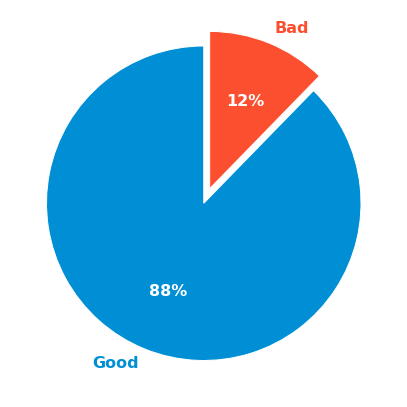

In [ ]:
pie_data = data['target'].value_counts(normalize=True).values * 100
pie_label = data['target'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()

plt.show()

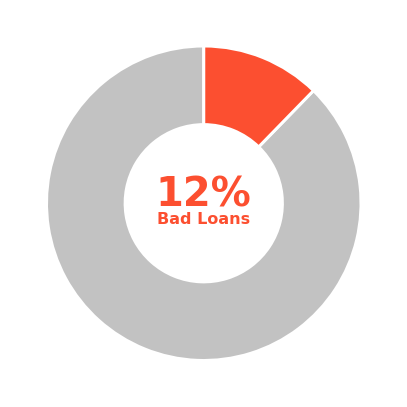

In [ ]:
pie_data = data['target'].value_counts(normalize=True).values * 100
pie_label = data['target'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges = ax.pie(pie_data, startangle=90,
                wedgeprops={'width':0.5, 'linewidth':3},
                colors=['#C2C2C2', '#FC4F30'])

text_1 = f'{pie_data[1]:.0f}%'
text_2 = 'Bad Loans'

ax.text(0, 0.05, text_1, fontsize=40, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')
ax.text(0, -0.1, text_2, fontsize=16, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')

plt.tight_layout()

plt.show()

As we can see, 12% of borrowers have bad loan status. Technically speaking, this dataset is an imbalanced dataset.

In [ ]:
data['initial_list_status'].value_counts()

f    303005
w    163280
Name: initial_list_status, dtype: int64

In [ ]:
a = ['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal']
mask = data['total_rev_hi_lim'].isna()

data.loc[mask]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Good
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Bad
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Good
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Good
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230652,1062400,1294262,20500,20500,20500.0,36 months,16.77,728.54,D,D2,NaN,7 years,RENT,60000.0,Source Verified,Jan-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Payoff Loan,100xx,NY,16.40,1.0,Oct-88,3.0,10.0,0.0,15417,58.4,20.0,f,0.00,0.00,26173.301,26173.30,20500.00,5673.30,0.00,0.00,0.00,Nov-14,10.21,Nov-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Good
230653,1059394,1291010,15000,15000,15000.0,36 months,15.27,521.97,C,C4,NaN,3 years,RENT,57600.0,Source Verified,Jan-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,business loan,900xx,CA,8.35,2.0,Jan-04,1.0,18.0,0.0,8897,33.1,30.0,f,0.00,0.00,18783.859,18783.86,15000.00,3783.86,0.00,0.00,0.00,Jan-15,541.95,Dec-14,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Good
230654,1059224,1290827,35000,35000,35000.0,36 months,15.96,1229.81,C,C5,Tom and Holly Gores,3 years,MORTGAGE,160000.0,Source Verified,Jan-12,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,Small Business Loan,922xx,CA,4.90,0.0,Sep-00,1.0,9.0,0.0,23665,62.4,17.0,f,0.00,0.00,44267.532,44267.53,35000.00,9267.53,0.00,0.00,0.00,Dec-14,1244.72,Dec-14,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN,Good
230655,1058722,1290521,12000,12000,12000.0,36 months,16.29,423.61,D,D1,NaN,NaN,MOR

In [ ]:
data.loc[mask, 'initial_list_status'].value_counts()

f    70276
Name: initial_list_status, dtype: int64

# Reference and Further Reading
- LendingClub. "What do the different Note statuses mean?" ([source](https://help.lendingclub.com/hc/en-us/articles/216109367-What-do-the-different-Note-statuses-mean-))
- Corporate Finance Institute. "Variance Inflation Factor (VIF)" ([source](https://corporatefinanceinstitute.com/resources/knowledge/other/variance-inflation-factor-vif/))